In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv("/Users/mac/Desktop/Hate-Speech-Detection-in-Social-Media-using-Python/HateSpeechData.csv")
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
df['text length'] = df['tweet'].apply(len)
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  text length  
0  !!! RT @mayasolovely: As a woman you shouldn't...          140  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...           85  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...          120  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...           62  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...          137  


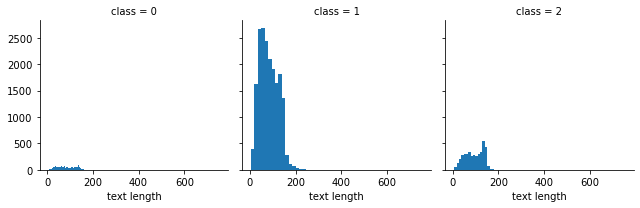

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(data=df, col='class')
graph.map(plt.hist, 'text length', bins=50)

In [6]:
tweet=df.tweet

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *


stopwords = nltk.corpus.stopwords.words("english")
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

In [8]:
def preprocess(tweet):  
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')
    
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')

    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
    
    newtweet=punc_remove.str.replace(r'\s+', ' ')
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    tweet_lower = newtweet.str.lower()

    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet
    
    return tweets_p

In [9]:
processed_tweets = preprocess(tweet)   

df['processed_tweets'] = processed_tweets
print(df[["tweet","processed_tweets"]].head(10))

/var/folders/39/yd6c1chs785bb6q842mt78n40000gn/T/ipykernel_43373/2270279765.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
/var/folders/39/yd6c1chs785bb6q842mt78n40000gn/T/ipykernel_43373/2270279765.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=punc_remove.str.replace(r'\s+', ' ')
/var/folders/39/yd6c1chs785bb6q842mt78n40000gn/T/ipykernel_43373/2270279765.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
/var/folders/39/yd6c1chs785bb6q842mt78n40000gn/T/ipykernel_43373/2270279765.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')


                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   
5  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...   
6  !!!!!!"@__BrighterDays: I can not just sit up ...   
7  !!!!&#8220;@selfiequeenbri: cause I'm tired of...   
8  " &amp; you might not get ya bitch back &amp; ...   
9  " @rhythmixx_ :hobbies include: fighting Maria...   

                                    processed_tweets  
0  woman complain clean hous amp man alway take t...  
1  boy dat cold tyga dwn bad cuffin dat hoe st place  
2         dawg ever fuck bitch start cri confus shit  
3                                   look like tranni  
4     shit hear might true might faker bitch told ya  
5      shit blow claim faith somebodi still fuck hoe 

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
tfidf = tfidf_vectorizer.fit_transform(df['processed_tweets'] )

tfidf

<24783x6441 sparse matrix of type '<class 'numpy.float64'>'
	with 189618 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

def train_test_model(model_type): 
    model_name = ""
    X = tfidf
    y = df['class'].astype(int)
    X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
    
    if(model_type == "LR"):
        model_name = "Logistic Regression"
        model = LogisticRegression()
    elif(model_type == "RF"):
        model_name = "Random Forest"
        model = RandomForestClassifier()
    elif(model_type == "NB"):
        model_name = "Naive Bayes"
        model = GaussianNB()
    elif(model_type == "SVM"):
        model_name = "Naive Bayes"
        model = LinearSVC(random_state=20)
    

    model.fit(X_train_tfidf,y_train)    
    y_preds = model.predict(X_test_tfidf)
    report = classification_report( y_test, y_preds )
    print(report)
    acc=accuracy_score(y_test,y_preds)
    print(model_name,", Accuracy Score:" , acc)

In [13]:
train_test_model("LR")
train_test_model("RF")
train_test_model("NB")
train_test_model("SVM")

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.56      0.18      0.27       290
           1       0.92      0.96      0.94      3832
           2       0.85      0.84      0.85       835

    accuracy                           0.90      4957
   macro avg       0.77      0.66      0.68      4957
weighted avg       0.88      0.90      0.88      4957

Logistic Regression , Accuracy Score: 0.8975186604801291
              precision    recall  f1-score   support

           0       0.52      0.16      0.25       290
           1       0.93      0.96      0.95      3832
           2       0.84      0.92      0.88       835

    accuracy                           0.91      4957
   macro avg       0.76      0.68      0.69      4957
weighted avg       0.89      0.91      0.89      4957

Random Forest , Accuracy Score: 0.9065967318942909
              precision    recall  f1-score   support

           0       0.46      0.26      0.33       290
           1       0.

In [14]:
X = tfidf
y = df['class'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
final_model = RandomForestClassifier()
final_model.fit(X_train_tfidf,y_train)    

RandomForestClassifier()

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS

sentiment_analyzer = VS()

def count_tags(tweet_c):  
    
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', tweet_c)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

def sentiment_analysis(tweet):   
    sentiment = sentiment_analyzer.polarity_scores(tweet)    
    twitter_objs = count_tags(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],twitter_objs[0], twitter_objs[1],
                twitter_objs[2]]
    #features = pandas.DataFrame(features)
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

final_features = sentiment_analysis_array(tweet)
#final_features

new_features = pd.DataFrame({'Neg':final_features[:,0],'Pos':final_features[:,1],'Neu':final_features[:,2],'Compound':final_features[:,3],
                            'url_tag':final_features[:,4],'mention_tag':final_features[:,5],'hash_tag':final_features[:,6]})
new_features

,Neg,Pos,Neu,Compound,url_tag,mention_tag,hash_tag
0,0.000,0.120,0.880,0.4563,0.0,1.0,0.0
1,0.237,0.000,0.763,-0.6876,0.0,1.0,0.0
2,0.538,0.000,0.462,-0.9550,0.0,2.0,0.0
3,0.000,0.344,0.656,0.5673,0.0,2.0,0.0
4,0.249,0.081,0.669,-0.7762,0.0,1.0,1.0
...,...,...,...,...,...,...,...
24778,0.000,0.000,1.000,0.0000,0.0,3.0,3.0
24779,0.454,0.000,0.546,-0.8074,0.0,0.0,0.0
24780,0.000,0.219,0.781,0.4738,0.0,0.0,0.0
24781,0.573,0.000,0.427,-0.7717,0.0,0.0,0.0


In [22]:
tfidf_a = tfidf.toarray()
modelling_features = np.concatenate([tfidf_a,final_features],axis=1)
modelling_features.shape


(24783, 6448)

In [25]:
def train_test_model_sentiment_analysis(model_type): 
    model_name = ""
    X = pd.DataFrame(modelling_features)
    y = df['class'].astype(int)
    X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
    
    if(model_type == "LR"):
        model_name = "Logistic Regression"
        model = LogisticRegression()
    elif(model_type == "RF"):
        model_name = "Random Forest"
        model = RandomForestClassifier()
    elif(model_type == "NB"):
        model_name = "Naive Bayes"
        model = GaussianNB()
    elif(model_type == "SVM"):
        model_name = "Naive Bayes"
        model = LinearSVC(random_state=20)
    

    model.fit(X_train_tfidf,y_train)    
    y_preds = model.predict(X_test_tfidf)
    report = classification_report( y_test, y_preds )
    print(report)
    acc=accuracy_score(y_test,y_preds)
    print(model_name,", Accuracy Score:" , acc)

In [34]:
train_test_model_sentiment_analysis("LR")
train_test_model_sentiment_analysis("RF")
# train_test_model_sentiment_analysis("NB")
train_test_model_sentiment_analysis("SVM")

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.60      0.19      0.29       290
           1       0.92      0.96      0.94      3832
           2       0.85      0.84      0.85       835

    accuracy                           0.90      4957
   macro avg       0.79      0.67      0.69      4957
weighted avg       0.89      0.90      0.89      4957

Logistic Regression , Accuracy Score: 0.898930804922332
              precision    recall  f1-score   support

           0       0.48      0.12      0.19       290
           1       0.91      0.96      0.94      3832
           2       0.84      0.83      0.84       835

    accuracy                           0.89      4957
   macro avg       0.74      0.64      0.66      4957
weighted avg       0.87      0.89      0.88      4957

Random Forest , Accuracy Score: 0.8916683477910026


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.46      0.26      0.33       290
           1       0.92      0.95      0.94      3832
           2       0.83      0.85      0.84       835

    accuracy                           0.89      4957
   macro avg       0.73      0.69      0.70      4957
weighted avg       0.88      0.89      0.88      4957

Naive Bayes , Accuracy Score: 0.8912648779503732


In [35]:
X = pd.DataFrame(modelling_features)
y = df['class'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
final_model = RandomForestClassifier()
final_model.fit(X_train_tfidf,y_train)    


RandomForestClassifier()

In [36]:
test_data = "aus tire big bitch come us skinni girl"
dtf = tfidf_vectorizer.transform([test_data]).toarray()

In [37]:
import pickle
pickle.dump(final_model, open('model.pkl','wb'))
# vec_file = 'vectorizer.pickle'
pickle.dump(tfidf_vectorizer, open("vectorizer.pickle", 'wb'))